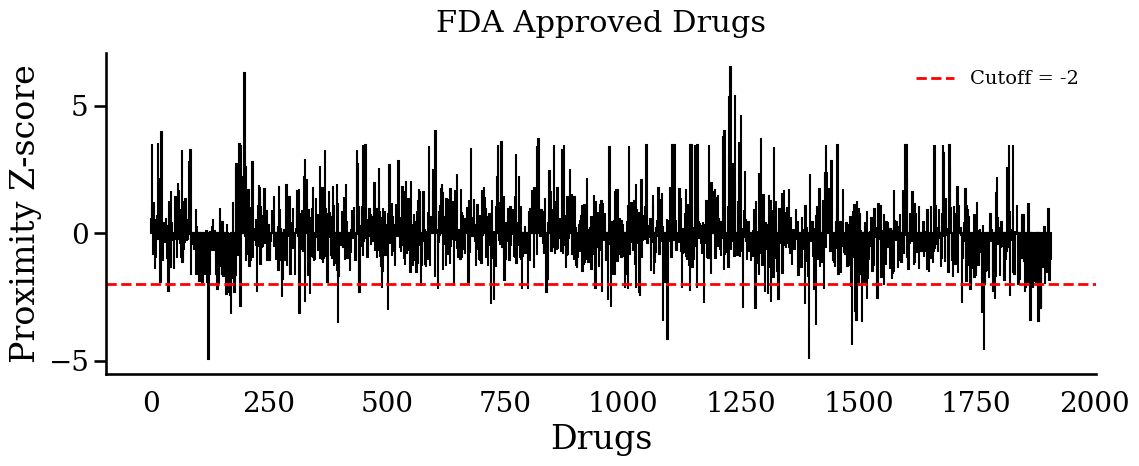

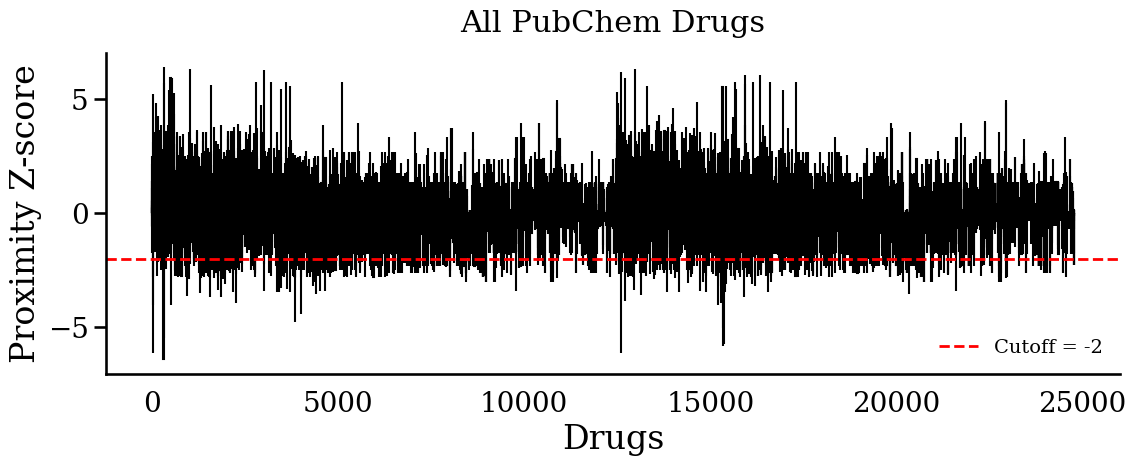

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_z_scores(csv_path, save_path, title):
    """
    Nature-style bar plot for z-scores with -2 cutoff line.
    """
    try:
        data = pd.read_csv(csv_path)
        if 'z' not in data.columns:
            raise ValueError("The CSV file must contain a 'z' column.")
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return

    # Extract data
    z_scores = data['z']
    drug_names = data['drug'] if 'drug' in data.columns else data.index

    # Plot styling
    plt.style.use("default")
    params = {
        "ytick.color": "black",
        "xtick.color": "black",
        "axes.labelcolor": "black",
        "axes.edgecolor": "black",
        "text.usetex": False,
        "font.family": "serif",
        "font.sans-serif": "Helvetica",
    }
    plt.rcParams.update(params)
    sns.set_context("talk")

    fig, ax = plt.subplots(figsize=(12, 5))

    # Color bars: red for z < -2
    bar_colors = ["red" if z < -2 else "#4C72B0" for z in z_scores]
    bars = ax.bar(drug_names, z_scores, color=bar_colors, edgecolor="black")

    # Add threshold line
    ax.axhline(y=-2, color="red", linestyle="--", linewidth=2, label="Cutoff = -2")

    # Customize appearance
    ax.set_ylabel("Proximity Z-score", fontsize=24)
    ax.set_xlabel("Drugs", fontsize=24)
    ax.set_title(title, fontsize=22, pad=15)

    ax.tick_params(axis="y", labelsize=20)
    ax.tick_params(axis="x", labelsize=20)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Optional: hide x-ticks if labels are messy
    ax.tick_params(axis="x", bottom=False)
    location="upper right"  if title == "FDA Approved Drugs" else "lower right"
    # Add legend for cutoff line
    ax.legend(fontsize=14, frameon=False, loc=location)

    # Tight layout and save
    plt.tight_layout()
    plt.savefig(save_path, format="png", bbox_inches="tight", dpi=900)
    plt.show()



result_path_fda="/home/sr933/rcc/4_network_analysis/data/drug_network_proximity_results_up_down_fda_no_common_essentials.csv"
save_path = "/home/sr933/output/z_scores_fda.png" 
plot_z_scores(result_path_fda, save_path, title="FDA Approved Drugs")

result_path_fda="/home/sr933/rcc/4_network_analysis/data/drug_network_proximity_results_up_down_all_no_common_essentials.csv"
save_path = "/home/sr933/output/z_scores_all.png" 
plot_z_scores(result_path_fda, save_path, title="All PubChem Drugs")